In [ ]:
%%writefile programa.cpp 
#include <iostream>

int main() {
  int a = 10;
  double b = 3.2;
  std::cout << "Saída: " << a << ";" << b << "\n";
  return 0;
}

Overwriting programa.cpp


Para rodar:
> g++ -o programa programa.cpp

> ./programa

Saída: 10;3.2


## Example: Escreva um programa que receba um inteiro n e calcule a seguinte série.

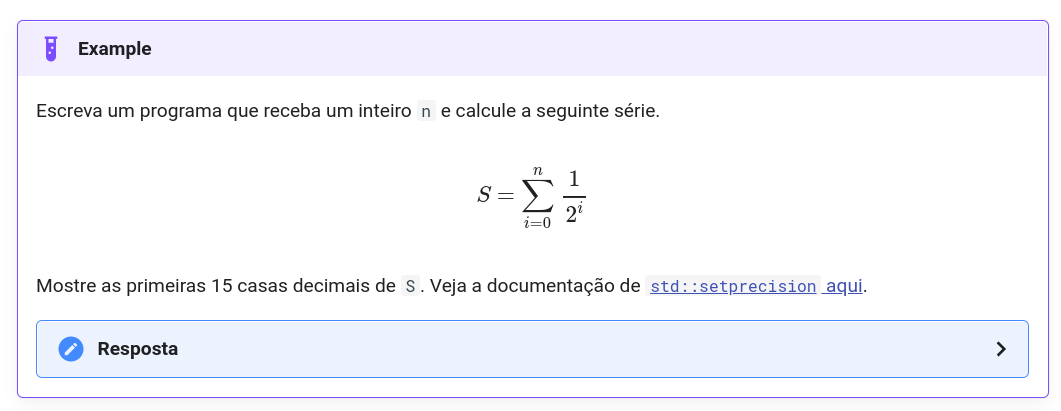

In [ ]:
%%writefile example.cpp 
#include <iostream>
#include <cmath>
#include <iomanip>

// Versão feita por mim e Amandinha, usando pow para fazer potência


int main() {
  double S = 0;
  int n;
  std::cin >> n;
  for (int i = 0; i <= n; i++) {
    S += 1.0/pow(2,i);
  }
  std::cout << std::fixed << std::setprecision(15) << S;
  return 0;
}

Overwriting example.cpp


In [ ]:
%%writefile example.cpp 
#include <iostream>
#include <cmath>
#include <iomanip>

// Versão feita pelo professor com shift


int main() {
  double S = 1;
  int n, p=1;
  std::cin >> n;
  for (int i = 1; i <= n; i++) {
    S += 1.0/(p=p<<1); //Coloca o p shiftado na variável p e pula o primeiro passo do cálculo. Logo a soma começa com S=1 e p=1
  }
  std::cout << std::fixed << std::setprecision(15) << S;
  return 0;
}

Overwriting example.cpp


**Obs.:** Mudou o codigo do pow para o shift (<<). O motivo é porque cálculos assim são muito mais demorados.
- O shift é em potencia de 2. Então 1<<i por exemplo seria 2^0, 2^1, 2^2, etc...

Obs: Resp coloca 2 e o resultado é 1.75

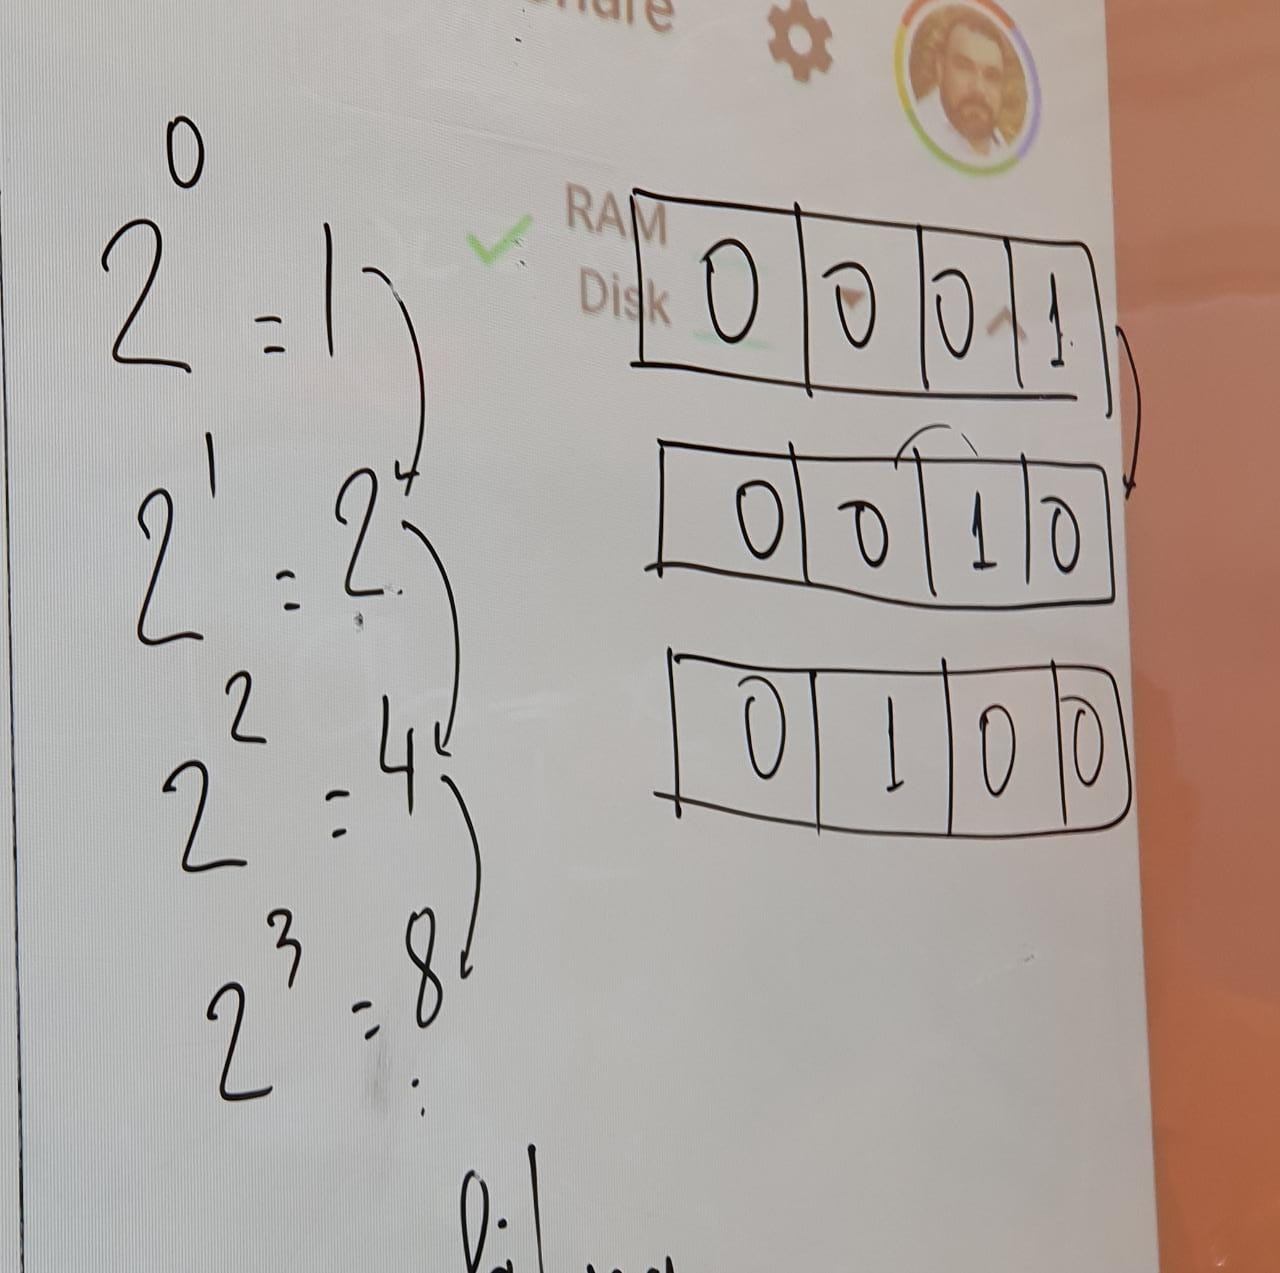

In [ ]:
!g++ -o example example.cpp

In [ ]:
!./example

2
1.750000000000000

In [ ]:
!./example < entrada.txt

**Obs.:**
- writefile: pega o conteudo dela e faz um arquivo com o nome "programa"
- !g++: compilar o programa


--------------------

# Vetores em C++ com Vector

In [ ]:
%%writefile vetorEx.cpp 
#include <iostream>
using namespace std;

#include <cmath>
#include <iomanip>
#include <vector>

int main() {
  int n;
  cin >> n;
  vector<double> vec;

  for (int i = 0; i < n; i++) {
      vec.push_back(i * i);
  }
  cout << "Tamanho do vetor: " << vec.size() << "\n";
  cout << "Primeiro elemento: " << vec.front() << "\n";
  cout << "Último elemento: " << vec.back() << "\n";
  cout << "Elemento 3: " << vec[2] << "\n";
}


Overwriting vetorEx.cpp


In [ ]:
!g++ -o vetorEx vetorEx.cpp

In [ ]:
!./vetorEx

3
Tamanho do vetor: 3
Primeiro elemento: 0
Último elemento: 4
Elemento 3: 4


### Example -> em python -> baseado no t4.py -> criar arquivo.txt com as entradas

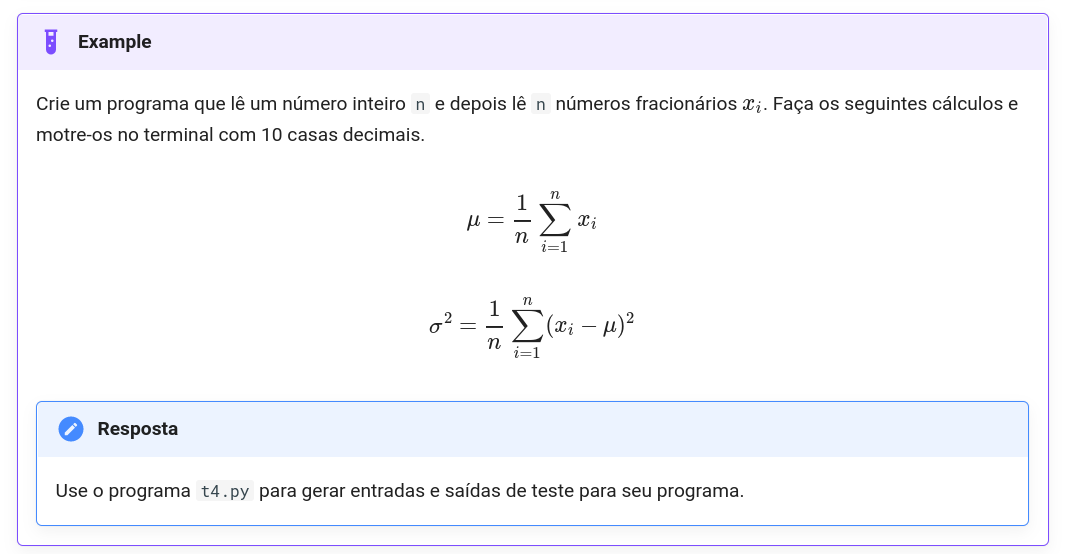

In [ ]:
import numpy as np
import numpy.random
import sys
import os

n = int(input())
arr = np.random.rand(n)
entradas = '\n'.join([str(a) for a in arr])

arquivo = "entradas.txt"

# Se o arquivo existir
if os.path.exists("entradas.txt"):
  with open("entradas.txt", "w") as arquivo: # "w" reescreve o conteudo do arquivo já existente
    arquivo.writelines(entradas)
    arquivo.close()

# Se ainda não existir
else: 
  arquivo = open("entradas.txt", 'x') # criar arquivo entradas.txt
  arquivo.writelines(entradas)
  arquivo.close()

f = open('entradas.txt')
print(f.read())

#print(f'{np.mean(arr):0.9f}', f'{np.var(arr):0.9f}', file=sys.stderr)


3
0.46431013243457075
0.46129658688072794
0.2638613815915306


In [ ]:
print(f'{np.mean(arr):0.9f}', f'{np.var(arr):0.9f}', file=sys.stderr)

0.396489367 0.008796605


In [ ]:
# Versão em python para fazer em C++ dps para transformar as linahs do txt em vetor
vetor_entradas = []
with open('entradas.txt', 'r') as arquivo:
    for i, linha in enumerate(arquivo): # i: índice da linha atual; linha: conteúdo da linha
      linha = linha.replace('\n', '') # tirar o '\n'
      vetor_entradas.append(linha)

print(vetor_entradas)

['0.46431013243457075', '0.46129658688072794', '0.2638613815915306']


In [ ]:
%%writefile exemplo.cpp 

#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <typeinfo>
#include <iomanip>
#include <cmath>
using namespace std;

int main() {
  vector<string> vetor_entradas; //vetor vazio
  ifstream arquivo("entradas.txt"); // ifstream: abre arquivo de entrada para leitura
  string linha; // cada linha do arquivi.txt
  double somaM = 0.0;
  double somaVar = 0.0;
  int tamanho = 0.0;
  double media = 0.0;
  double variancia = 0.0;
  double subQuad = 0.0;

  if (arquivo.is_open()) {
    while (getline(arquivo, linha)) {
      linha.erase(linha.size()-1); // remove o caractere de quebra de linha
      vetor_entradas.push_back(linha);
    }
    arquivo.close();
  }
  else {
    cout << "Não foi possível abrir o arquivo";
    return 1;
  }

  // MÉDIA 
  for (auto& entrada: vetor_entradas) {
    double linhaNum = stod(entrada); // stod: transformar cada linha de string para double
    //cout << "Entrada type: " << typeid(linhaNum).name() << endl; // typeid: conferir o tipo de linhaNum
    somaM += linhaNum;
    tamanho += 1;

  }
  media = somaM/tamanho;
  cout << fixed << setprecision(10) << "Resultado da Média: " << media << "\n";

  // VARIÂNCIA
  for (auto& entrada: vetor_entradas) {
    double linhaNum = stod(entrada);
    subQuad = pow((linhaNum-media), 2);
    somaVar += subQuad;
  }
  variancia = (1.0/tamanho)*somaVar;
  cout << fixed << setprecision(10) << "Resultado da Variância: " << variancia << "\n";
}


Overwriting exemplo.cpp


In [ ]:
!g++ -o exemplo exemplo.cpp

In [ ]:
!./exemplo

Resultado da Média: 0.3964893670
Resultado da Variância: 0.0087966048


## Ex Vetor - versaoG

In [ ]:
%%writefile exVetorG.cpp 

#include<iostream>
#include<math.h>
#include<iomanip>      // std::setprecision
#include<vector>
using namespace std;

int main(){
    int n;
    cin >> n;
    vector<double> vec;
    double xi;
    for (int i = 0; i < n; i++) { 
        cin >> xi;
        vec.push_back(xi);
    }

    double mu,s, desvpad;
    s=0;
    for (int i = 1; i <= n; i++) {
        s+=vec[i-1];
    }
    mu=s/n;
    s=0;
    for (int i = 1; i <= n; i++) {
        s+=pow(vec[i-1]-mu,2);
    }
    desvpad = s/n;

    cout << "Tamanho do vetor: " << vec.size() << "\n";
    cout << "mu: " << mu << "\n";
    cout << "desvpad: " << desvpad << "\n";

return 0;
}


Writing exVetorG.cpp


In [ ]:
!g++ -o exVetorG exVetorG.cpp

In [ ]:
!./exVetorG

3
5
3
5
Tamanho do vetor: 3
mu: 4.33333
desvpad: 0.888889


--------

# Matrizes (versão 1)

In [ ]:
# Criação de todos os arquivos in e out (resposta)

import numpy as np
import numpy.random
import numpy.linalg

n_points = [1, 5, 20, 120, 2300]

for i, n in enumerate(n_points): # i: localização na lista, n: valor da posição
    mat = np.random.rand(n, 2) * 10000
    with open(f't6-in-{i}.txt', 'w') as f:
        print(n, file=f)
        for p in mat:
            print(p[0], p[1], file=f)
    
    with open(f't6-out-{i}.txt', 'w') as f:
        for i, p in enumerate(mat):
            for j, p2 in enumerate(mat):
                print(f'{np.linalg.norm(p-p2):.2f}', end=' ', file=f)
            print('', file=f)


In [ ]:
%%writefile programa.cpp 

#include <iostream>
#include <cmath>
#include <iomanip>
#include <vector>

using namespace std;

int main() {
  int N; // numero da quant de cidades
  cin >> N;
  vector<double> x,y;
  vector<vector<double>> d; // vetor de vetores

  // Leitura de cidades

  for (int i=0; i<N;i++) {
    double xa, ya; // localização de cada cidade
    cin >> xa >> ya;
    x.push_back(xa);
    y.push_back(ya);
  }

  // Cálculo das cidades

  for (int i=0; i<N; i++) {
    vector<double> v;
    for (int j = 0; j < N; j++){
      double dist = sqrt(pow(x[i]-x[j],2)+pow(y[i]-y[j], 2));
      v.push_back(dist);
    }
    d.push_back(v);
  }

  // Impressão das cidades

  for (int i=0; i<N; i++){
    for (int j=0; j<N; j++){
      cout << d[i][j] << "\n";
    }
  }
  return 0;
}



Overwriting programa.cpp


In [ ]:
!g++ -o programa programa.cpp

In [ ]:
# Pra testar:
!./programa < "t6-in-1.txt"

0
3974.09
6664.77
988.483
5820.1
3974.09
0
5364.71
4958.43
1912.1
6664.77
5364.71
0
7365.92
5103.37
988.483
4958.43
7365.92
0
6808.58
5820.1
1912.1
5103.37
6808.58
0


- vetor com N posições (todas nulas inicialmente)
- d: vetor distancias
- quando sair do for vai ter todas as coordenadas das cidades no x e y
- colocar o vetor dentro da matriz: d.push_back(v)

*!Obs.:* Percebe-se que nesse código, estamos gastando poder computacional pelos seguintes motivos;
- decomposição LU (ao fazer o cálculo da diagonal superior da matriz, não é necessário fazer do lado da diagonal inferior) --> gasta o dobro de vezes q precisa fazer cálculos --> distancia de A para B é igual de B para A
- gasta em fazer cálculos como distancia de A para A, obvio que sempre vai ser zero
- Complexidade: O(n2). Explicação: se você tem um loop que executa n vezes em uma entrada de tamanho n, o tempo de execução é O(n). Se você tem um loop dentro de outro loop que executa n vezes, o tempo de execução é O(n^2).

### Crie uma função calcula_distancias que recebe a matriz e os dados recebidos na entrada e a preenche. Sua função não deverá retornar nenhum valor.

In [ ]:
%%writefile programaFunc.cpp 

#include <iostream>
#include <cmath>
#include <iomanip>
#include <vector>

using namespace std;

int calcula_distancia(int N, vector<double>& x, vector<double>& y) {
  vector<vector<double>> d; // vetor de vetores

  // Cálculo das cidades
  for (int i=0; i<N; i++) {
    vector<double> v;
    for (int j = 0; j < N; j++){
      double dist = sqrt(pow(x[i]-x[j],2)+pow(y[i]-y[j], 2));
      v.push_back(dist);
    }
    d.push_back(v);
  }

  return 0;
}

int main() {
  int N; // numero da quant de cidades
  cin >> N;
  vector<double> x,y;

  // Leitura de cidades

  for (int i=0; i<N;i++) {
    double xa, ya; // localização de cada cidade
    cin >> xa >> ya;
    x.push_back(xa);
    y.push_back(ya);
  }

  calcula_distancia(N, x,y);

  return 0;
}



Overwriting programaFunc.cpp


In [ ]:
!g++ -o programaFunc programaFunc.cpp

In [ ]:
!./programaFunc < "t6-in-4.txt"

In [ ]:
import subprocess
import time

start = time.perf_counter()
comando = ["./programaFunc", "t6-in-4.txt"]
proc = subprocess.run(comando, capture_output=True, text=True)
end = time.perf_counter()

print('Saída:', proc.stdout)
print('Stderr:', proc.stderr)
print('Tempo total(s):', end - start)

Saída: 
Stderr: 
Tempo total(s): 0.014308318999610492
